<a href="https://colab.research.google.com/github/Jalalbaim/Cats-Dogs-detection/blob/main/It_rains_dogs%26cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT RAINS DOGS AND CATS**
***


## **Importing Dataset**

In [17]:
!pip install opendatasets

In [18]:
import opendatasets as od
import os

od.download("https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs")

Skipping, found downloaded files in "./cat-and-dogs" (use force=True to force download)


## **Discovering Dataset**

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras

In [20]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.5),
    zoom_range=[0.95, 1.05]
)

In [21]:
# Train data
train_path = '/content/cat-and-dogs/dataset/training_set'
train_data = datagen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 8000 images belonging to 2 classes.


In [22]:
# Test data
test_path = '/content/cat-and-dogs/dataset/test_set'
datagen_test=ImageDataGenerator(rescale=1.0/255.0)
test_data = datagen_test.flow_from_directory(
    test_path,
    shuffle = False,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.


(32, 224, 224, 3)


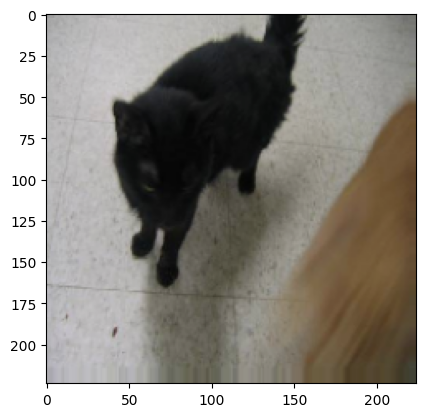

(32, 224, 224, 3)


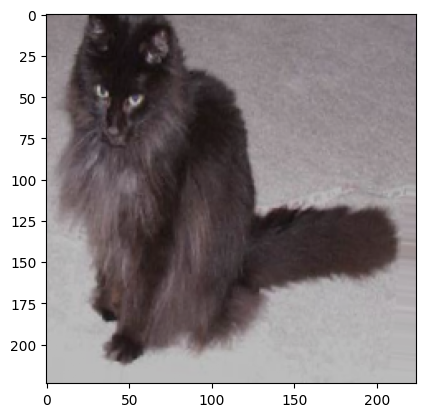

(32, 224, 224, 3)


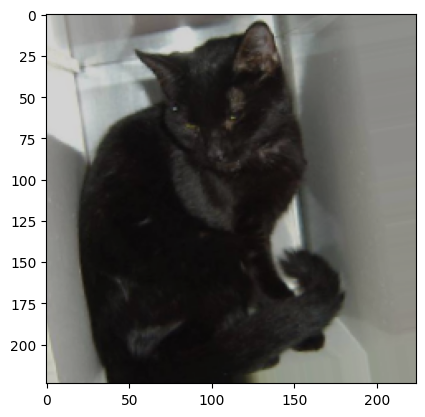

(32, 224, 224, 3)


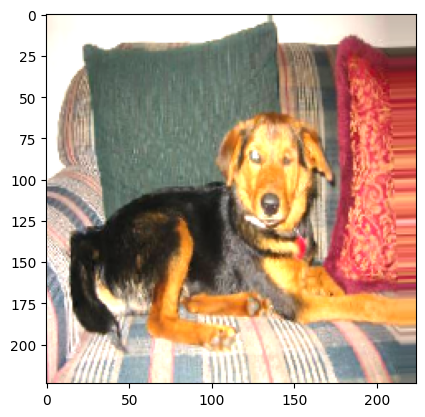

(32, 224, 224, 3)


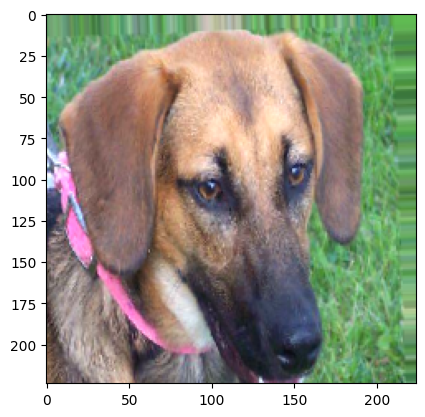

In [23]:
# Discovering Datasets
batch_size = 32
for i in range(5):
    img, labels = train_data.next()
    if img.shape[0] == 32:
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))
        plt.show()

## **Let's build our model**

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# feature extractor
# We ll be use transfer learning, feature extractore using VGG16
base_model = tf.keras.applications. VGG16(
      weights='imagenet',
      include_top=False,
      input_shape=(224, 224, 3))

def feature_extractor(inputs):
  feature_extractor = base_model(inputs)
  return feature_extractor


In [26]:
# build layers

def dense_layers(features):

  x = tf.keras.layers.Flatten()(features)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  return x

In [27]:
# classifier

def classifier(x):
  classification = tf.keras.layers.Dense(2, activation='sigmoid', name='classifier')(x)
  return classification

In [28]:
# model classification

def model_classification(inputs):

  features = feature_extractor(inputs)
  out_dense = dense_layers(features)
  output = classifier(out_dense)
  # model
  model = tf.keras.Model(inputs = inputs, outputs = output)

  return model


In [47]:
# Compile model
from tensorflow.keras.optimizers import Adam
def compile():
  inputs = tf.keras.layers.Input(shape = (224, 224,3))
  model = model_classification(inputs)
  model.compile(
      optimizer = Adam(lr=0.001),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )

  return model

In [30]:
# Model
for layer in base_model.layers:
    layer.trainable = False

model = compile()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                           

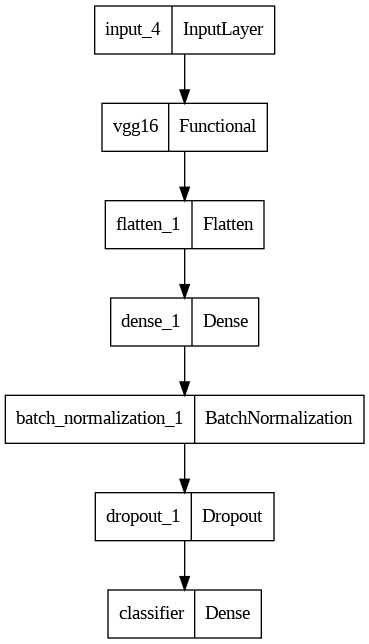

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model

plot_model(model)

## Train The Model
***

In [32]:
history = model.fit(train_data, epochs= 20,steps_per_epoch=200, validation_data= test_data )

Epoch 1/20
200/200 [==============================] - 133s 650ms/step - loss: 0.3287 - accuracy: 0.8669 - val_loss: 0.2217 - val_accuracy: 0.9150
Epoch 2/20
200/200 [==============================] - 103s 512ms/step - loss: 0.2394 - accuracy: 0.9013 - val_loss: 0.2146 - val_accuracy: 0.9165
Epoch 3/20
200/200 [==============================] - 103s 515ms/step - loss: 0.2057 - accuracy: 0.9145 - val_loss: 0.1866 - val_accuracy: 0.9210
Epoch 4/20
200/200 [==============================] - 106s 531ms/step - loss: 0.1966 - accuracy: 0.9197 - val_loss: 0.1872 - val_accuracy: 0.9225
Epoch 5/20
200/200 [==============================] - 103s 516ms/step - loss: 0.1920 - accuracy: 0.9231 - val_loss: 0.1905 - val_accuracy: 0.9265
Epoch 6/20
200/200 [==============================] - 105s 525ms/step - loss: 0.1814 - accuracy: 0.9250 - val_loss: 0.1913 - val_accuracy: 0.9205
Epoch 7/20
200/200 [==============================] - 107s 535ms/step - loss: 0.1833 - accuracy: 0.9228 - val_loss: 0.2228 -

Text(0, 0.5, 'Categorical Accuracy')

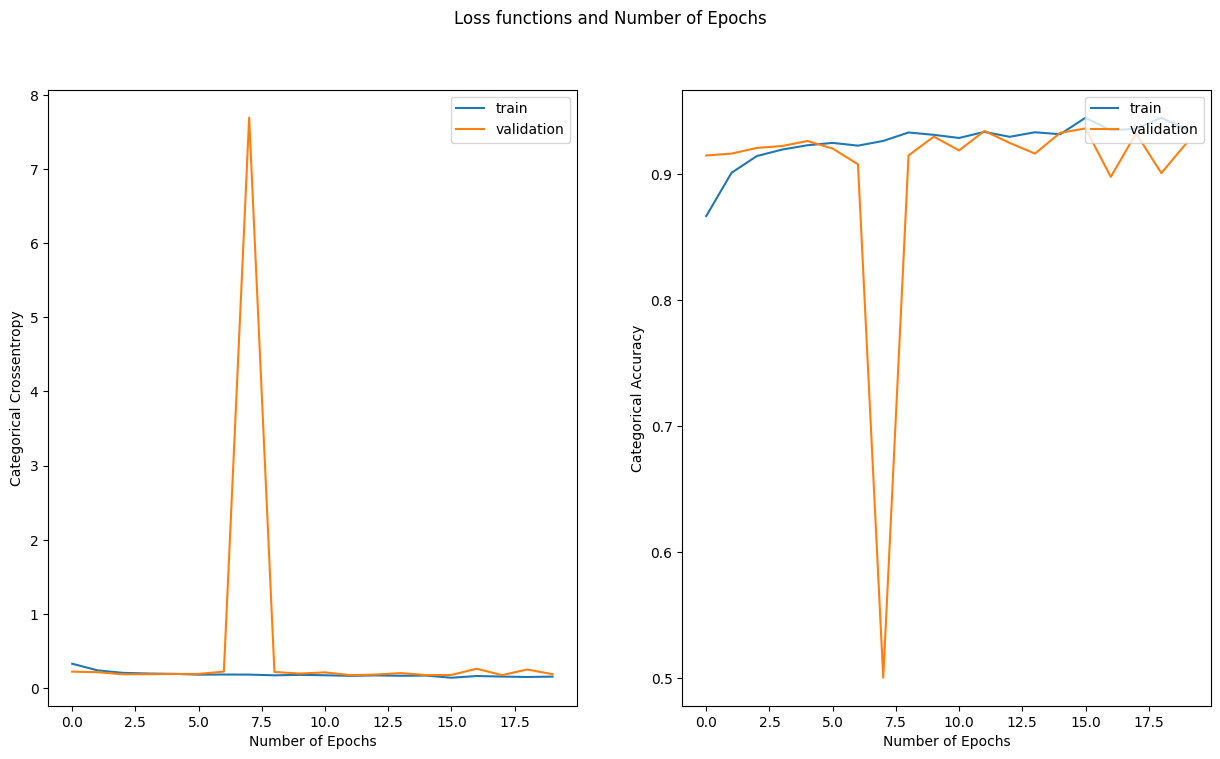

In [33]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#2nd plot : Categorical accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

## Classification report

In [34]:
from sklearn.metrics import classification_report,  confusion_matrix, f1_score
import seaborn as sns

In [35]:
#evaluating the model
loss, acc = model.evaluate(test_data)
print(loss)
print('')
print('The categorical accuracy or how often the predictions match the labels is ' + f'{acc*100:.{0}f}' + '%')
print('')
#getting predictions for futher evaluation
preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)
#looking at the values that were predicted and the true values
print('The predicted values are:')
print(preds)
print('')
print('The actual values are:')
print(test_data.classes)
print('')
print('Classification Report:')
print(classification_report(test_data.classes, preds, labels=[0,1,2]))

63/63 [==============================] - 9s 134ms/step - loss: 0.1878 - accuracy: 0.9250
0.18778598308563232

The categorical accuracy or how often the predictions match the labels is 93%

63/63 [==============================] - 9s 132ms/step
The predicted values are:
[1 0 0 ... 0 1 1]

The actual values are:
[0 0 0 ... 1 1 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1000
           1       0.95      0.90      0.92      1000
           2       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.93      0.93      0.92      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Confusion matrix

[Text(0, 0.5, 'dogs'), Text(0, 1.5, 'cats')]

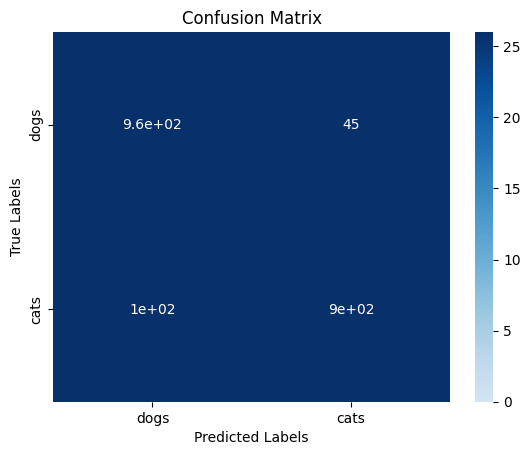

In [36]:
#creating confusion matrix plot with sns
cm=confusion_matrix(test_data.classes, preds)
ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['dogs', 'cats'])
ax.yaxis.set_ticklabels(['dogs', 'cats'])

## *Bounding Boxes*

In [40]:
import os, re, time, json
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import cv2

In [41]:
def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color=(255, 0, 0), thickness=5):
    """
    Adds a bounding box to an image.
    Bounding box coordinates can be specified in either absolute (pixel) or
    normalized coordinates by setting the use_normalized_coordinates argument.

    Args:
      image: a PIL.Image object.
      ymin: ymin of bounding box.
      xmin: xmin of bounding box.
      ymax: ymax of bounding box.
      xmax: xmax of bounding box.
      color: color to draw bounding box. Default is red.
      thickness: line thickness. Default value is 4.
    """

    image_width = image.shape[1]
    image_height = image.shape[0]
    cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), color, thickness)


def draw_bounding_boxes_on_image(image, boxes, color=[], thickness=5):
    """
    Draws bounding boxes on image.

    Args:
      image: a PIL.Image object.
      boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
             The coordinates are in normalized format between [0, 1].
      color: color to draw bounding box. Default is red.
      thickness: line thickness. Default value is 4.

    Raises:
      ValueError: if boxes is not a [N, 4] array
    """

    boxes_shape = boxes.shape
    if not boxes_shape:
        return
    if len(boxes_shape) != 2 or boxes_shape[1] != 4:
        raise ValueError('Input must be of size [N, 4]')
    for i in range(boxes_shape[0]):
        draw_bounding_box_on_image(image, boxes[i, 1], boxes[i, 0], boxes[i, 3],
                                 boxes[i, 2], color[i], thickness)


def draw_bounding_boxes_on_image_array(image, boxes, color=[], thickness=5):
    """
    Draws bounding boxes on image (numpy array).

    Args:
      image: a numpy array object.
      boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
             The coordinates are in normalized format between [0, 1].
      color: color to draw bounding box. Default is red.
      thickness: line thickness. Default value is 4.
      display_str_list_list: a list of strings for each bounding box.

    Raises:
      ValueError: if boxes is not a [N, 4] array
    """

    draw_bounding_boxes_on_image(image, boxes, color, thickness)

    return image

In [48]:
def bounding_box_regression(x):

    bounding_box_regression_output = tf.keras.layers.Dense(units = '4', name = "bounding_box")(x)

    return bounding_box_regression_output

In [51]:
def final_model(inputs):

    # features
    feature_cnn = feature_extractor(inputs)

    # dense layers
    last_dense_layer = dense_layers(feature_cnn)

    # bounding box
    bounding_box_output = bounding_box_regression(last_dense_layer)

    model_box = tf.keras.Model(inputs = inputs, outputs= bounding_box_output)

    return model_box

In [52]:
def define_and_compile_model():

    inputs = tf.keras.layers.Input(shape=(224,224,3))

    model = final_model(inputs)

    model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9),
                  loss='MSE',
                  metrics =['accuracy'])
    return model

In [56]:
# define your model
model_box = define_and_compile_model()
# print model layers
model_box.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                           

In [59]:
EPOCHS = 50

# Choose a batch size
BATCH_SIZE = 64

# Get the length of the training set
length_of_training_dataset = len(train_data)

# Get the length of the validation set
length_of_validation_dataset = len(test_data)

# Get the steps per epoch (may be a few lines of code)
steps_per_epoch = 6033//BATCH_SIZE

# get the validation steps (per epoch) (may be a few lines of code)
validation_steps = length_of_validation_dataset//BATCH_SIZE
if length_of_validation_dataset % BATCH_SIZE > 0:
    validation_steps += 1

history = model_box.fit(train_data,
                    steps_per_epoch=steps_per_epoch, validation_data=test_data, validation_steps=validation_steps, epochs=EPOCHS)

Epoch 1/50


InvalidArgumentError: ignored